# Route Optimisation Algorithm Demonstration

## What this demo covers
This demo showcases some basic variants of the TSP problem. *Important call out*: many real-life applications may not be able to lean on the Google OR Tools library since they may have some incredibly specific constraints, so it may be a case of needing to do some extra bespoke development which will lengthen the delivery cycle. 

In [1]:
import math
import numpy as np
import pandas as pd
from call_funcs import data_generator, distance_finder
from problem_solver import problem_solver
from route_operations import route_cleaner, fetch_route_detail
from plotting_helper import plot_routes
from multi_depot_solver import multi_depot_solver

## First Example: simple case - one depot, multiple drivers

This is a relatively simple example, where we just look at getting some drivers from a certain start point to cover a set of calls; no thought towards even distribution of work, etc

In [2]:
engineers = 3
jobs = 12
time_limit = 10

In [3]:
call_locations = data_generator(jobs,200,200)
distance_matrix = distance_finder(call_locations)

In [4]:
call_locations

,index,x,y
0,0,104,153
1,1,22,42
2,2,24,125
3,3,0,197
4,4,163,6
5,5,69,195
6,6,6,70
7,7,185,134
8,8,72,62
9,9,86,112


In [5]:
distance_matrix

[[0, 138, 84, 112, 158, 54, 128, 83, 96, 44, 119, 61],
 [138, 0, 83, 156, 145, 160, 32, 187, 53, 94, 21, 184],
 [84, 83, 0, 75, 182, 83, 57, 161, 79, 63, 62, 144],
 [112, 156, 75, 0, 251, 69, 127, 195, 153, 120, 136, 169],
 [158, 145, 182, 251, 0, 211, 169, 129, 106, 131, 148, 152],
 [54, 160, 83, 69, 211, 0, 139, 131, 133, 84, 138, 102],
 [128, 32, 57, 127, 169, 139, 0, 190, 66, 90, 21, 181],
 [83, 187, 161, 195, 129, 131, 190, 0, 133, 101, 174, 31],
 [96, 53, 79, 153, 106, 133, 66, 133, 0, 51, 46, 133],
 [44, 94, 63, 120, 131, 84, 90, 101, 51, 0, 77, 91],
 [119, 21, 62, 136, 148, 138, 21, 174, 46, 77, 0, 168],
 [61, 184, 144, 169, 152, 102, 181, 31, 133, 91, 168, 0]]

In [6]:
routes = problem_solver(distance_matrix, engineers)

Route for vehicle 0:
 0 ->  2 ->  6 ->  10 ->  1 ->  8 ->  9 -> 0
Distance of the route: 331m

Route for vehicle 1:
 0 ->  3 ->  5 ->  11 -> 0
Distance of the route: 344m

Route for vehicle 2:
 0 ->  7 ->  4 -> 0
Distance of the route: 370m

Distance travelled:  1045


In [7]:
clean_routes = route_cleaner(routes, jobs, True)
routes_data = fetch_route_detail(clean_routes, call_locations)
routes_data

,index,x_coord,y_coord,driver,order
0,0,104,153,0,0
1,2,24,125,0,1
2,6,6,70,0,2
3,10,26,63,0,3
4,1,22,42,0,4
5,8,72,62,0,5
6,9,86,112,0,6
7,0,104,153,1,0
8,3,0,197,1,1
9,5,69,195,1,2


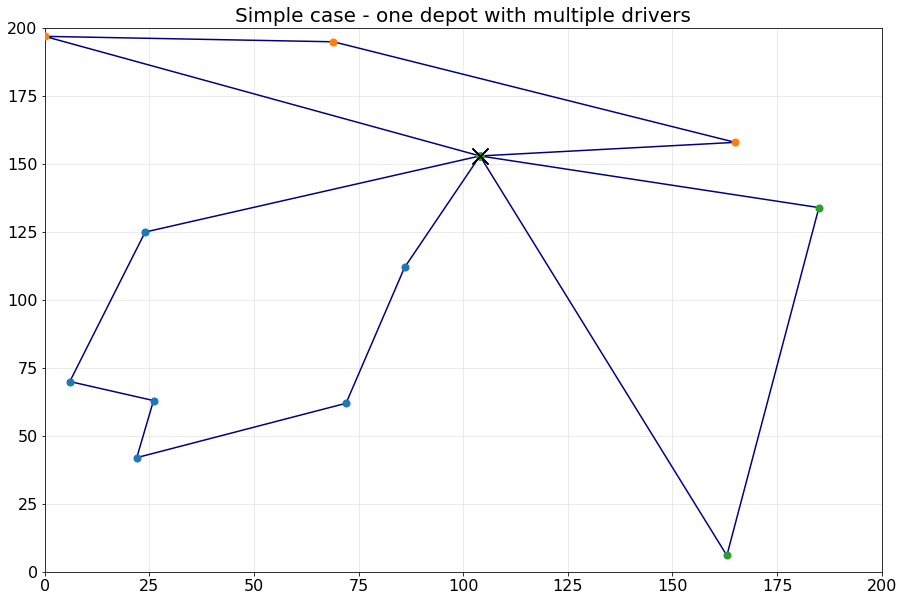

In [8]:
plot_routes(routes_data, 'Simple case - one depot with multiple drivers')

## Second Example: Multiple start points, even distribution of work

In this example, each crew starts from a different place, and all crews must perform the same number of repairs/jobs/callouts.

In [9]:
engineers = 3
jobs = 12
time_limit = 10
call_locations = data_generator(jobs,200,200)
distance_matrix = distance_finder(call_locations)

In [10]:
multi_depot_routes = multi_depot_solver(distance_matrix, engineers)
multi_depot_routes

Route for vehicle 0:
 4 ->  2 ->  1 ->  6 -> 4
Distance of the route: 242m

Route for vehicle 1:
 5 ->  9 ->  11 ->  8 -> 5
Distance of the route: 274m

Route for vehicle 2:
 10 ->  7 ->  0 ->  3 -> 10
Distance of the route: 264m

Distance travelled:  780


[[4, 2, 1, 6], [5, 9, 11, 8], [10, 7, 0, 3]]

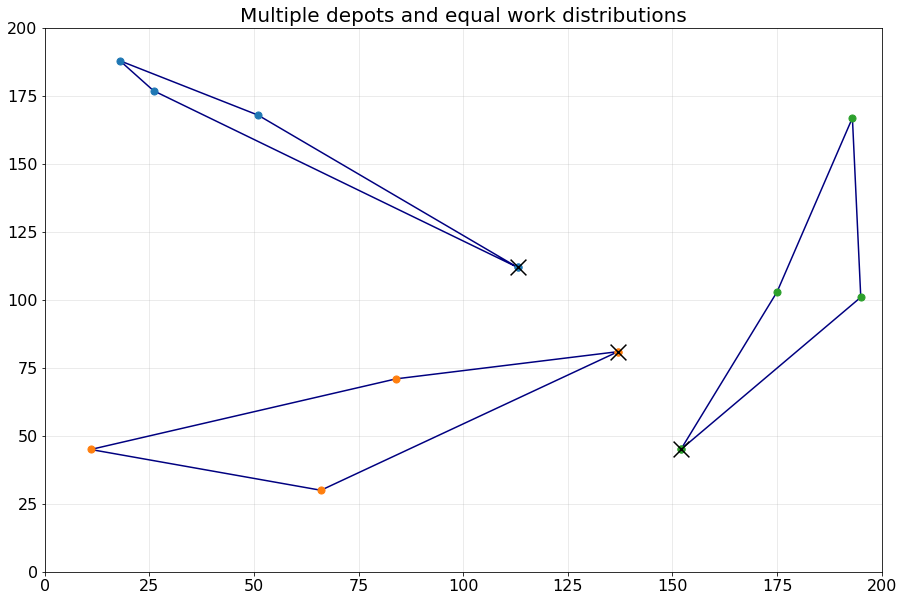

In [11]:
multi_depot_routes_data = fetch_route_detail(multi_depot_routes, call_locations)
plot_routes(multi_depot_routes_data, 'Multiple depots and equal work distributions')